In [1]:
import pandas as pd
import pickle

In [2]:
data = pd.read_csv('../secondary_data_no_miss.csv', sep = ';')

In [3]:
# replace all letters with actual value

data = data.replace(
    {
    'class': {'p': 'poisonous', 'e': 'edible'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 's': 'sunken', 'p': 'spherical', 'o': 'others'},
    'cap-surface': {'i': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth', 'd': 'dry', 'h': 'shiny', 'l': 'leathery', 'k': 'silky', 't': 'sticky', 'w': 'wrinkled', 'e': 'fleshy'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black'},
    'gill-attachment': {'a': 'adnate', 'x': 'adnexed', 'd': 'decurrent', 'e': 'free', 's': 'sinuate', 'p': 'pores', 'f': 'none', '?': 'unknown'},
    'gill-spacing': {'c': 'close', 'd': 'distant', 'f': 'none'},
    'gill-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'},
    'stem-color': {'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black', 'f': 'none'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'r': 'flaring', 'g': 'grooved', 'l': 'large', 'p': 'pendant', 's': 'sheathing', 'z': 'zone', 'y': 'scaly', 'm': 'movable', 'f': 'none', '?': 'unknown'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'h': 'heaths', 'u': 'urban', 'w': 'waste', 'd': 'woods'},
    'season': {'s': 'spring', 'u': 'summer', 'a': 'autumn', 'w': 'winter'}
    })

# convert t/f columns to boolean.
data['does-bruise-or-bleed'] = data['does-bruise-or-bleed']=='t'
data['has-ring'] = data['has-ring']=='t'

In [4]:
data

class  cap-diameter cap-shape cap-surface cap-color  \
0         edible          1.26    convex     grooves    yellow   
1         edible         10.32      flat      fleshy      buff   
2      poisonous          0.92    convex     grooves      pink   
3      poisonous          4.27    convex      sticky      pink   
4         edible          3.08      flat      smooth     white   
...          ...           ...       ...         ...       ...   
61064  poisonous         12.79    convex      fleshy     brown   
61065  poisonous          2.42    convex         dry     white   
61066     edible         12.33    sunken      sticky    purple   
61067  poisonous          3.85    sunken    wrinkled    purple   
61068  poisonous          1.98    convex     fibrous     black   

       does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
0                     False       decurrent        close      white   
1                     False          adnate        close       buff   
2                     False          adnate        close       pink   
3                     False         adnexed        close      white   
4                     False       decurrent      distant      white   
...                     ...             ...          ...        ...   
61064                  True           pores        close        red   
61065                 False          adnate      distant       pink   
61066                 False         sinuate        close     purple   
61067                 False          adnate        close     purple   
61068                 False          adnate        close      white   

       stem-height  stem-width stem-color  has-ring ring-type  habitat  season  
0             5.04        1.73     yellow     False      none    woods  autumn  
1             4.68       19.44      white      True      none    woods  autumn  
2             4.59        1.15      black     False      none    woods  summer  
3             4.55        6.52      white     False      none    woods  autumn  
4             2.67        5.18      white     False      none  meadows  autumn  
...            ...         ...        ...       ...       ...      ...     ...  
61064         9.60       25.61     yellow     False      none    woods  summer  
61065         3.52        2.20      white     False      none  grasses  summer  
61066         7.71       21.99     purple     False      none    woods  autumn  
61067         5.32        5.59     purple     False      none   leaves  autumn  
61068         3.16        2.41      white     False      none  grasses  autumn  

[61069 rows x 16 columns]

In [5]:
one_hot_df = pd.get_dummies(data=data, columns=[
                                                'cap-surface',
                                                'cap-color',
                                                'does-bruise-or-bleed',
                                                'gill-attachment',
                                                'gill-spacing',
                                                'gill-color',
                                                'cap-shape',
                                                'stem-color',
                                                'has-ring',
                                                'ring-type',
                                                'habitat',
                                                'season'])
one_hot_df

class  cap-diameter  stem-height  stem-width  cap-surface_dry  \
0         edible          1.26         5.04        1.73                0   
1         edible         10.32         4.68       19.44                0   
2      poisonous          0.92         4.59        1.15                0   
3      poisonous          4.27         4.55        6.52                0   
4         edible          3.08         2.67        5.18                0   
...          ...           ...          ...         ...              ...   
61064  poisonous         12.79         9.60       25.61                0   
61065  poisonous          2.42         3.52        2.20                1   
61066     edible         12.33         7.71       21.99                0   
61067  poisonous          3.85         5.32        5.59                0   
61068  poisonous          1.98         3.16        2.41                0   

       cap-surface_fibrous  cap-surface_fleshy  cap-surface_grooves  \
0                        0                   0                    1   
1                        0                   1                    0   
2                        0                   0                    1   
3                        0                   0                    0   
4                        0                   0                    0   
...                    ...                 ...                  ...   
61064                    0                   1                    0   
61065                    0                   0                    0   
61066                    0                   0                    0   
61067                    0                   0                    0   
61068                    1                   0                    0   

       cap-surface_leathery  cap-surface_scaly  ...  habitat_leaves  \
0                         0                  0  ...               0   
1                         0                  0  ...               0   
2                         0                  0  ...               0   
3                         0                  0  ...               0   
4                         0                  0  ...               0   
...                     ...                ...  ...             ...   
61064                     0                  0  ...               0   
61065                     0                  0  ...               0   
61066                     0                  0  ...               0   
61067                     0                  0  ...               1   
61068                     0                  0  ...               0   

       habitat_meadows  habitat_paths  habitat_urban  habitat_waste  \
0                    0              0              0              0   
1                    0              0              0              0   
2                    0              0              0              0   
3                    0              0              0              0   
4                    1              0              0              0   
...                ...            ...            ...            ...   
61064                0              0              0              0   
61065                0              0              0              0   
61066                0              0              0              0   
61067                0              0              0              0   
61068                0              0              0              0   

       habitat_woods  season_autumn  season_spring  season_summer  \
0                  1              1              0              0   
1                  1              1              0              0   
2                  1              0              0              1   
3                  1              1              0              0   
4                  0              1              0              0   
...              ...            ...            ...            ...   
61064              1              0              0      

In [6]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
one_hot_df['class']= le.fit_transform(one_hot_df['class'])
##add code to convert 1s and 0s into one-hot encoded to_categorical function - each value pair of 0s and 1s

In [7]:
one_hot_df

class  cap-diameter  stem-height  stem-width  cap-surface_dry  \
0          0          1.26         5.04        1.73                0   
1          0         10.32         4.68       19.44                0   
2          1          0.92         4.59        1.15                0   
3          1          4.27         4.55        6.52                0   
4          0          3.08         2.67        5.18                0   
...      ...           ...          ...         ...              ...   
61064      1         12.79         9.60       25.61                0   
61065      1          2.42         3.52        2.20                1   
61066      0         12.33         7.71       21.99                0   
61067      1          3.85         5.32        5.59                0   
61068      1          1.98         3.16        2.41                0   

       cap-surface_fibrous  cap-surface_fleshy  cap-surface_grooves  \
0                        0                   0                    1   
1                        0                   1                    0   
2                        0                   0                    1   
3                        0                   0                    0   
4                        0                   0                    0   
...                    ...                 ...                  ...   
61064                    0                   1                    0   
61065                    0                   0                    0   
61066                    0                   0                    0   
61067                    0                   0                    0   
61068                    1                   0                    0   

       cap-surface_leathery  cap-surface_scaly  ...  habitat_leaves  \
0                         0                  0  ...               0   
1                         0                  0  ...               0   
2                         0                  0  ...               0   
3                         0                  0  ...               0   
4                         0                  0  ...               0   
...                     ...                ...  ...             ...   
61064                     0                  0  ...               0   
61065                     0                  0  ...               0   
61066                     0                  0  ...               0   
61067                     0                  0  ...               1   
61068                     0                  0  ...               0   

       habitat_meadows  habitat_paths  habitat_urban  habitat_waste  \
0                    0              0              0              0   
1                    0              0              0              0   
2                    0              0              0              0   
3                    0              0              0              0   
4                    1              0              0              0   
...                ...            ...            ...            ...   
61064                0              0              0              0   
61065                0              0              0              0   
61066                0              0              0              0   
61067                0              0              0              0   
61068                0              0              0              0   

       habitat_woods  season_autumn  season_spring  season_summer  \
0                  1              1              0              0   
1                  1              1              0              0   
2                  1              0              0              1   
3                  1              1              0              0   
4                  0              1              0              0   
...              ...            ...            ...            ...   
61064              1              0              0              1   
61065              0           

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
target = one_hot_df["class"]
target_names = ["edible", "poisonous"]

In [10]:
mushroom_df = one_hot_df.drop("class", axis=1)
feature_names = mushroom_df.columns
mushroom_df.head()

cap-diameter  stem-height  stem-width  cap-surface_dry  \
0          1.26         5.04        1.73                0   
1         10.32         4.68       19.44                0   
2          0.92         4.59        1.15                0   
3          4.27         4.55        6.52                0   
4          3.08         2.67        5.18                0   

   cap-surface_fibrous  cap-surface_fleshy  cap-surface_grooves  \
0                    0                   0                    1   
1                    0                   1                    0   
2                    0                   0                    1   
3                    0                   0                    0   
4                    0                   0                    0   

   cap-surface_leathery  cap-surface_scaly  cap-surface_shiny  ...  \
0                     0                  0                  0  ...   
1                     0                  0                  0  ...   
2                     0                  0                  0  ...   
3                     0                  0                  0  ...   
4                     0                  0                  0  ...   

   habitat_leaves  habitat_meadows  habitat_paths  habitat_urban  \
0               0                0              0              0   
1               0                0              0              0   
2               0                0              0              0   
3               0                0              0              0   
4               0                1              0              0   

   habitat_waste  habitat_woods  season_autumn  season_spring  season_summer  \
0              0              1              1              0              0   
1              0              1              1              0              0   
2              0              1              0              0              1   
3              0              1              1              0              0   
4              0              0              1              0              0   

   season_winter  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 92 columns]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn import linear_model
X_train, X_test, Y_train, Y_test = train_test_split(mushroom_df, target, random_state=42)

regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train, Y_train)
predicted = regr.predict(X_test)
predicted

array([0.67109108, 0.38010216, 0.70193291, ..., 0.39193153, 0.46161652,
       0.55179787])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(mushroom_df, target, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(mushroom_df)

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9962012051349227

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [20]:
# Save the model as a pickle in a file
import joblib
joblib.dump(rf, 'rf_all.pkl')

['rf_all.pkl']

In [17]:
pickle.dump(scaler, open('scaler_rf.pkl', 'wb'))

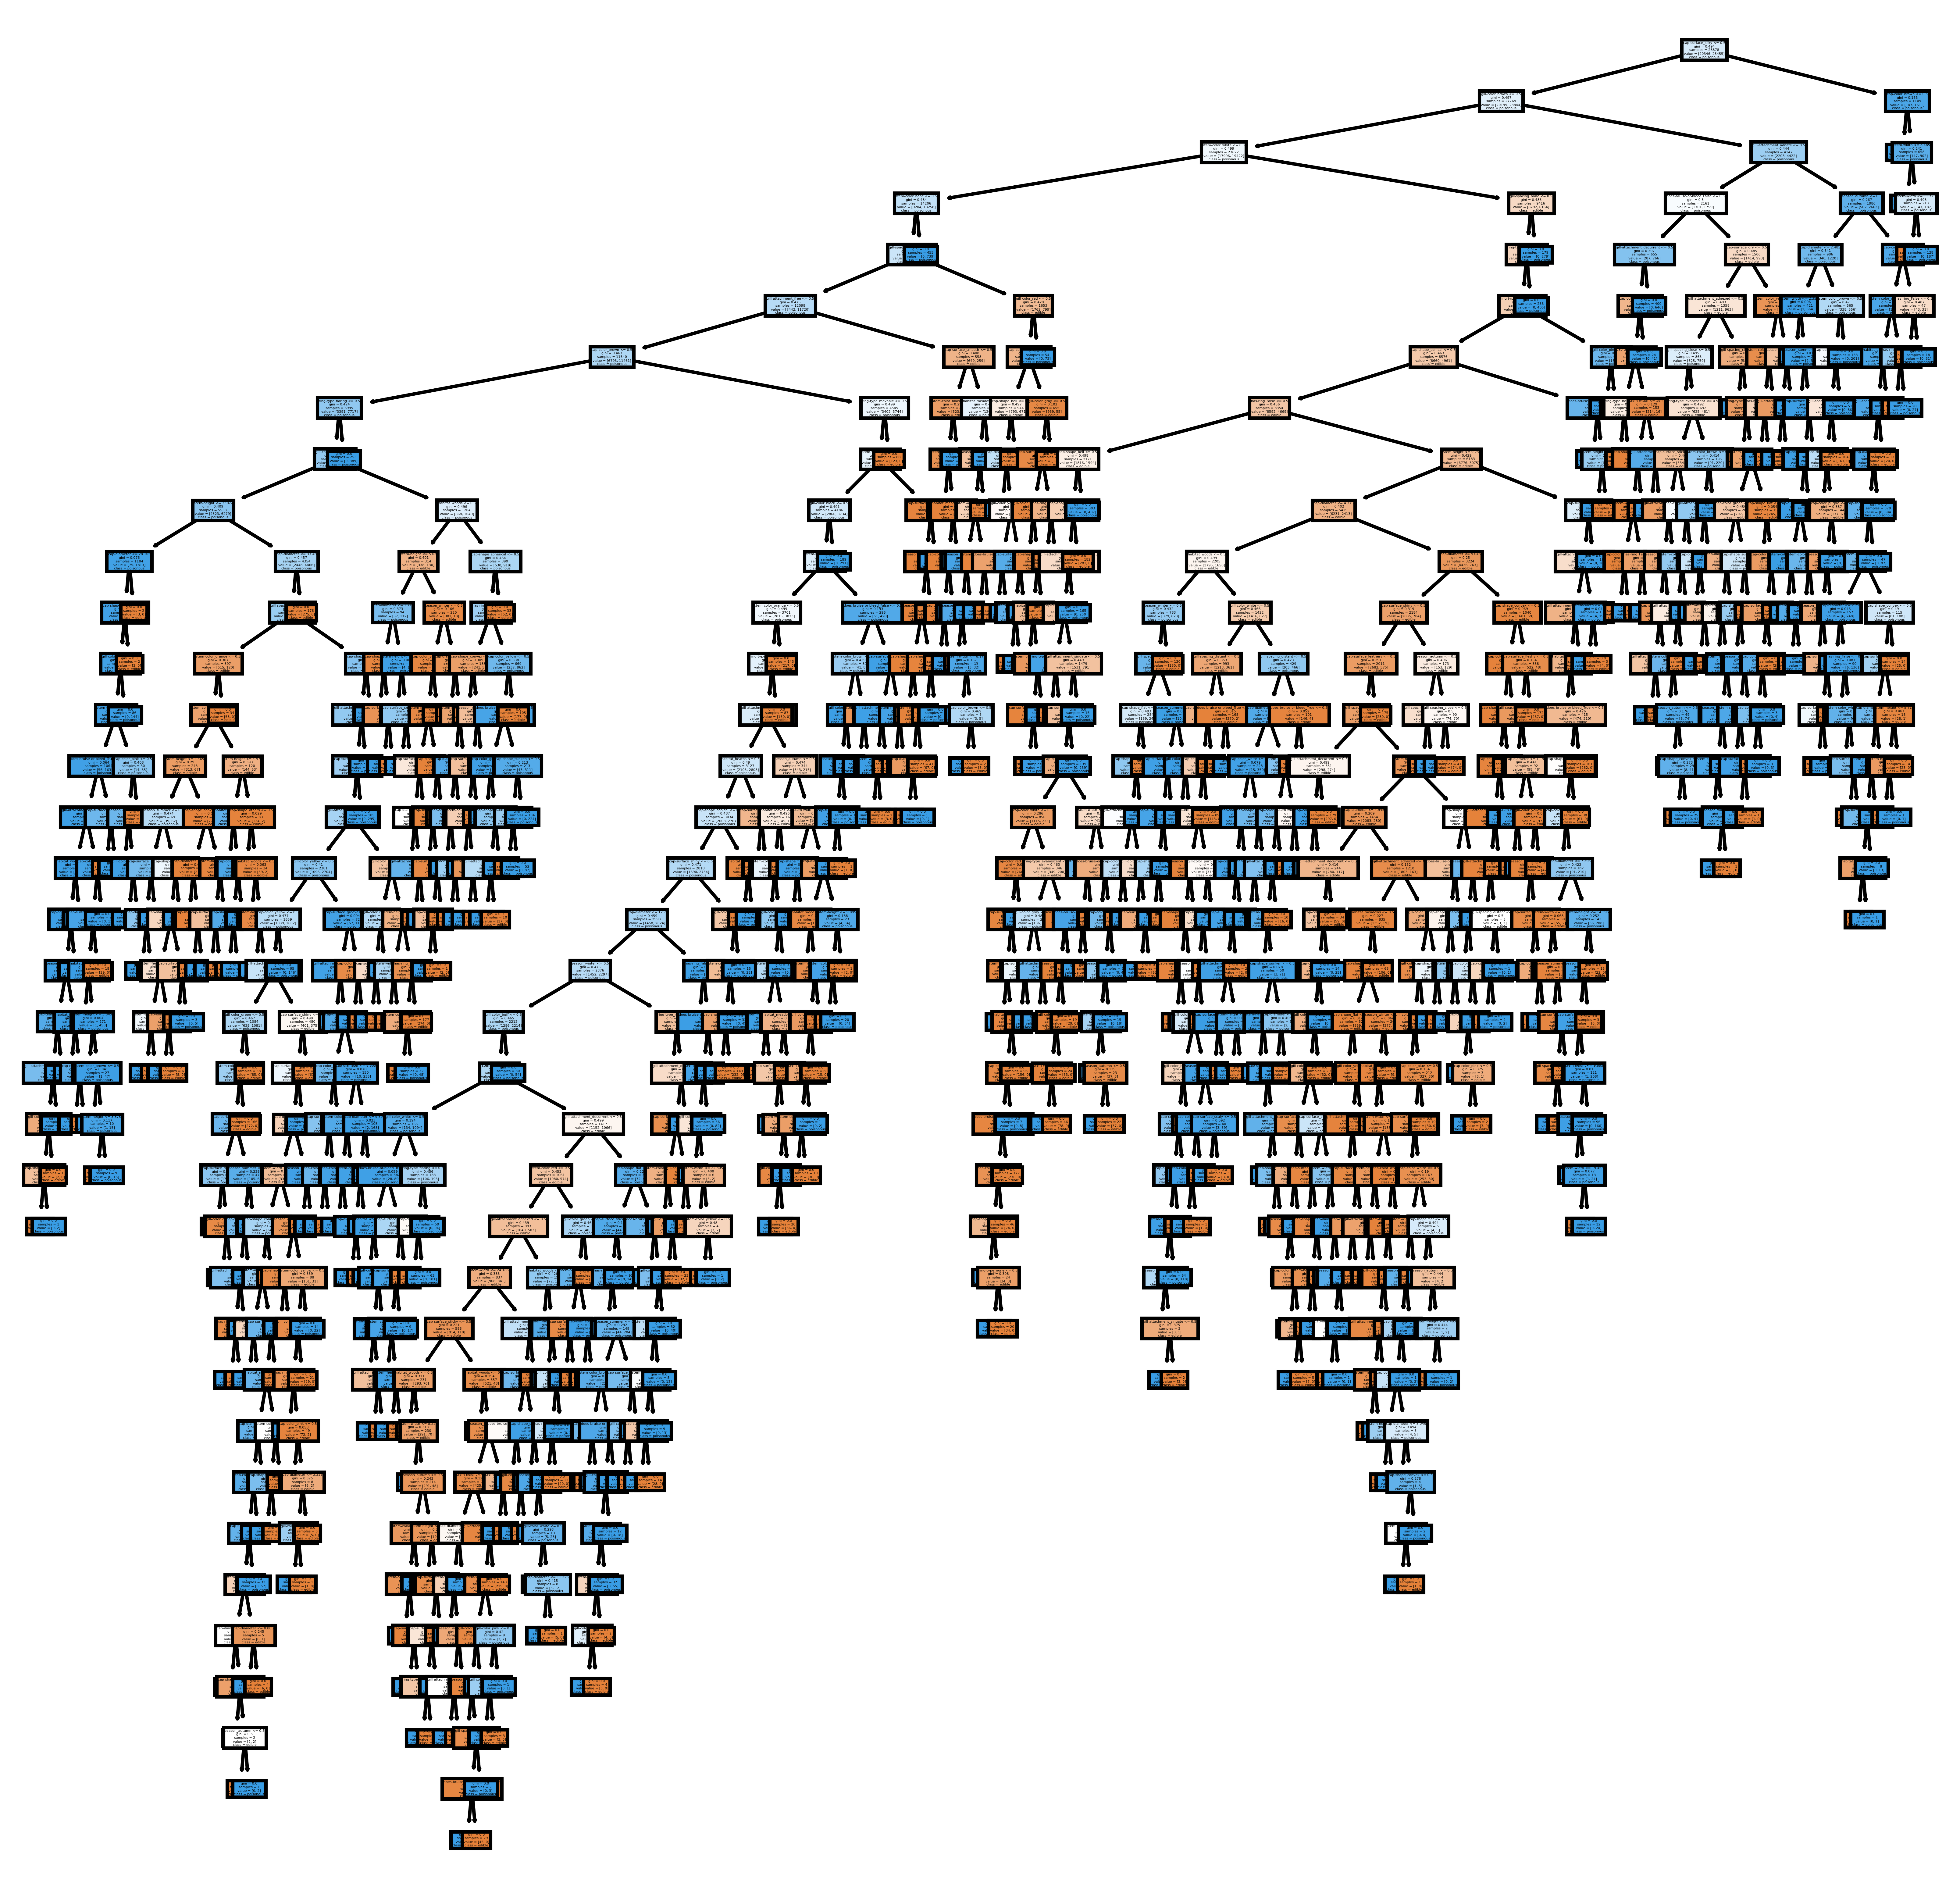

In [19]:
import matplotlib.pyplot as plt
fn=feature_names
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

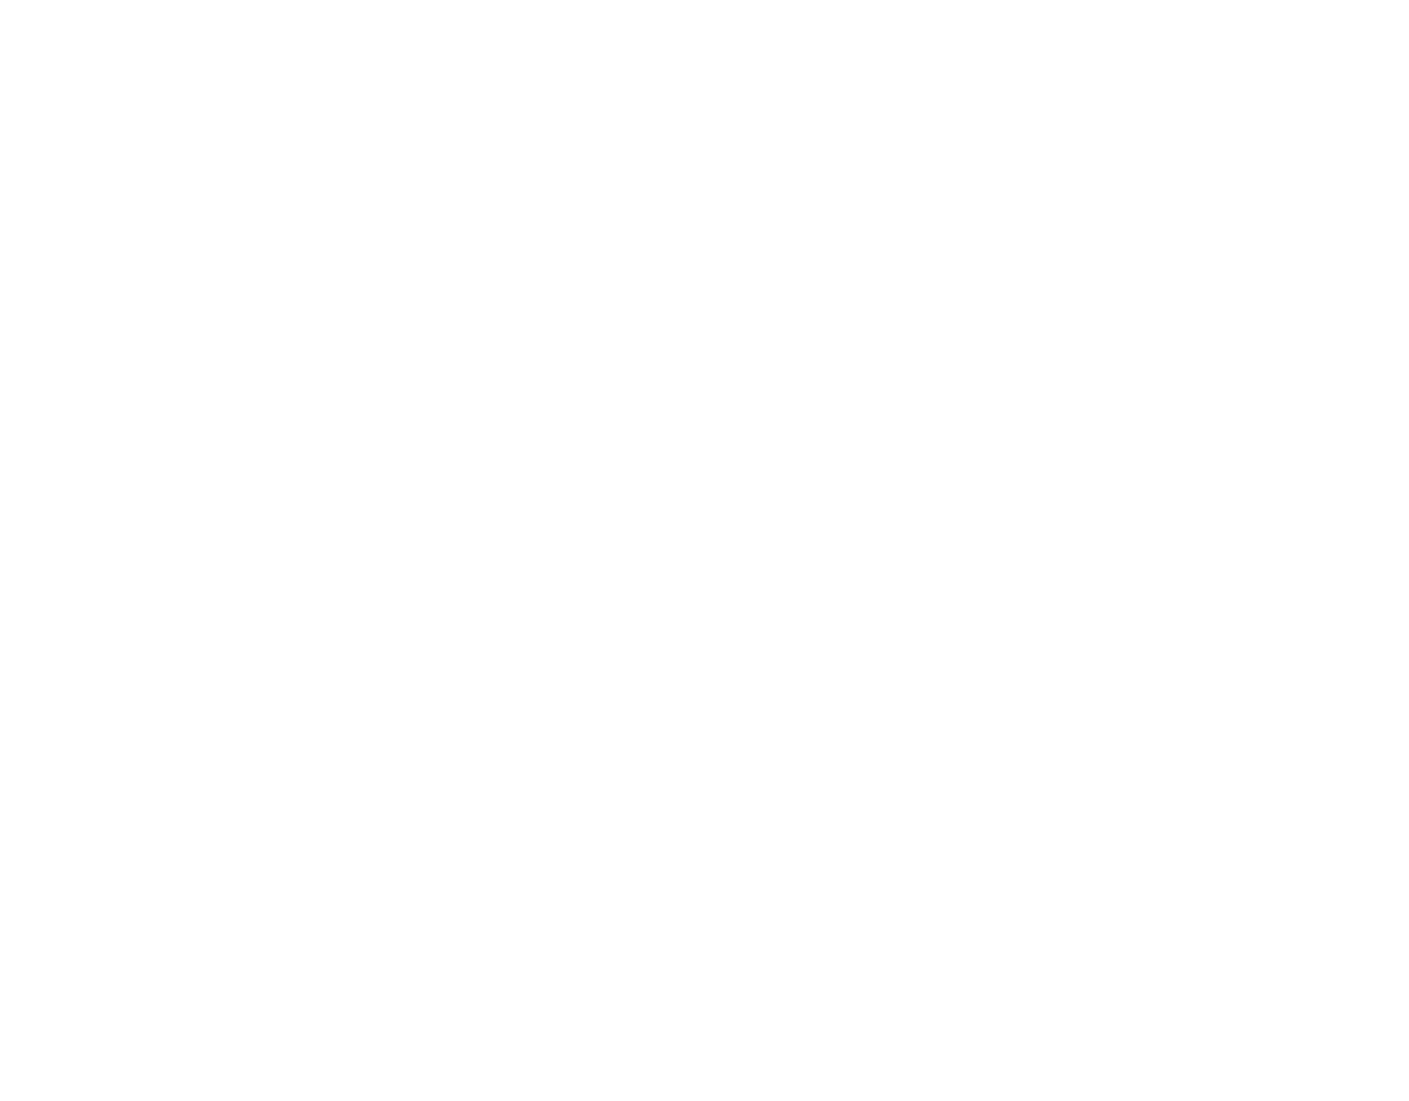

In [20]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rf, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

In [ ]:
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
'dot', '-Tpng', 'tree.dot', '-o', 'tree.png'


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [24]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.1041912060664015, 'stem-width'),
 (0.06646183330824698, 'cap-diameter'),
 (0.06370116841009688, 'stem-height'),
 (0.03454814185206125, 'stem-color_white'),
 (0.028928772334107702, 'gill-spacing_close'),
 (0.026123984277242367, 'gill-color_white'),
 (0.02363496819454127, 'gill-attachment_pores'),
 (0.0230264991792124, 'gill-spacing_distant'),
 (0.01886734421347026, 'gill-attachment_adnate'),
 (0.018606285879005403, 'gill-attachment_decurrent'),
 (0.01799686537334957, 'does-bruise-or-bleed_True'),
 (0.017935998781690526, 'cap-shape_convex'),
 (0.017314697123094358, 'cap-surface_sticky'),
 (0.016533856117743252, 'gill-color_yellow'),
 (0.016531395968515737, 'gill-attachment_adnexed'),
 (0.015836920238699072, 'does-bruise-or-bleed_False'),
 (0.014772950141369456, 'has-ring_True'),
 (0.014766596012424258, 'cap-shape_bell'),
 (0.014670488139428523, 'stem-color_brown'),
 (0.014319443613948532, 'ring-type_zone'),
 (0.013910597051020086, 'gill-color_brown'),
 (0.013761774514653203, 'gill-at

In [23]:
edible_df = one_hot_df[one_hot_df['class'] == 0]
edible_df.head()

class  cap-diameter  stem-height  stem-width  cap-surface_dry  \
0      0          1.26         5.04        1.73                0   
1      0         10.32         4.68       19.44                0   
4      0          3.08         2.67        5.18                0   
8      0         10.89         8.03       17.11                0   
9      0          5.64         7.55       15.69                0   

   cap-surface_fibrous  cap-surface_fleshy  cap-surface_grooves  \
0                    0                   0                    1   
1                    0                   1                    0   
4                    0                   0                    0   
8                    0                   0                    0   
9                    0                   0                    0   

   cap-surface_leathery  cap-surface_scaly  ...  habitat_leaves  \
0                     0                  0  ...               0   
1                     0                  0  ...               0   
4                     0                  0  ...               0   
8                     0                  0  ...               0   
9                     0                  0  ...               0   

   habitat_meadows  habitat_paths  habitat_urban  habitat_waste  \
0                0              0              0              0   
1                0              0              0              0   
4                1              0              0              0   
8                1              0              0              0   
9                0              0              0              0   

   habitat_woods  season_autumn  season_spring  season_summer  season_winter  
0              1              1              0              0              0  
1              1              1              0              0              0  
4              0              1              0              0              0  
8              0              1              0              0              0  
9              1              0              0              1              0  

[5 rows x 93 columns]

The Correlation Coefficient is: -0.12228520276627752


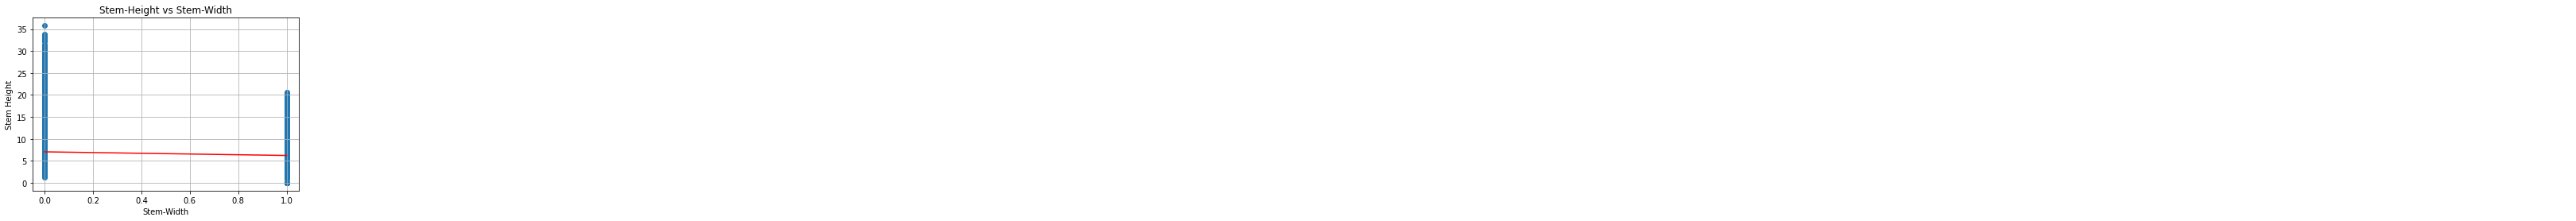

In [25]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
x_values = one_hot_df["class"]
y_values = one_hot_df["stem-height"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Stem-Width")
plt.ylabel("Stem Height")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Stem-Height vs Stem-Width")
# plt.tight_layout()
plt.grid()
# plt.savefig("North_Temp_vs_Lat.png")
plt.show()

The Correlation Coefficient is: 0.4427632879456844


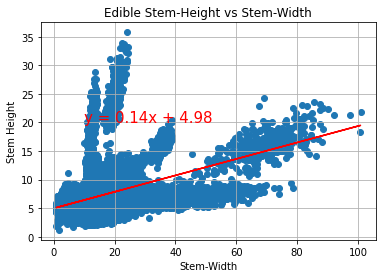

In [26]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
x_values = edible_df["stem-width"]
y_values = edible_df["stem-height"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Stem-Width")
plt.ylabel("Stem Height")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Edible Stem-Height vs Stem-Width")
# plt.tight_layout()
plt.grid()
# plt.savefig("North_Temp_vs_Lat.png")
plt.show()

In [27]:
poisonous_df = one_hot_df[one_hot_df['class'] == 1]
# poisonous_df.head()

The Correlation Coefficient is: 0.3971176860838446


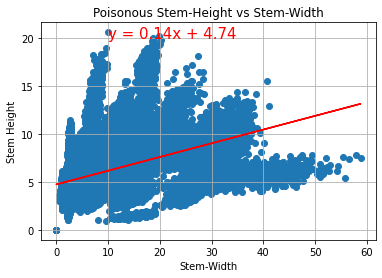

In [28]:
x_values = poisonous_df["stem-width"]
y_values = poisonous_df["stem-height"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatterplot with linear regression
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel("Stem-Width")
plt.ylabel("Stem Height")
print(f"The Correlation Coefficient is: {rvalue}")
plt.title("Poisonous Stem-Height vs Stem-Width")
# plt.tight_layout()
plt.grid()
# plt.savefig("North_Temp_vs_Lat.png")
plt.show()

In [29]:
poisonous_df.describe()

class  cap-diameter   stem-height    stem-width  cap-surface_dry  \
count  33888.0  33888.000000  33888.000000  33888.000000     33888.000000   
mean       1.0      5.888355      6.220516     10.377341         0.069848   
std        0.0      3.965523      3.140745      8.721628         0.254894   
min        1.0      0.410000      0.000000      0.000000         0.000000   
25%        1.0      3.060000      4.220000      3.580000         0.000000   
50%        1.0      4.990000      5.650000      7.670000         0.000000   
75%        1.0      7.860000      7.750000     14.360000         0.000000   
max        1.0     30.280000     20.600000     58.770000         1.000000   

       cap-surface_fibrous  cap-surface_fleshy  cap-surface_grooves  \
count         33888.000000        33888.000000         33888.000000   
mean              0.054090            0.040162             0.081504   
std               0.226198            0.196341             0.273611   
min               0.000000            0.000000             0.000000   
25%               0.000000            0.000000             0.000000   
50%               0.000000            0.000000             0.000000   
75%               0.000000            0.000000             0.000000   
max               1.000000            1.000000             1.000000   

       cap-surface_leathery  cap-surface_scaly  ...  habitat_leaves  \
count          33888.000000       33888.000000  ...    33888.000000   
mean               0.020833           0.089855  ...        0.033729   
std                0.142828           0.285978  ...        0.180533   
min                0.000000           0.000000  ...        0.000000   
25%                0.000000           0.000000  ...        0.000000   
50%                0.000000           0.000000  ...        0.000000   
75%                0.000000           0.000000  ...        0.000000   
max                1.000000           1.000000  ...        1.000000   

       habitat_meadows  habitat_paths  habitat_urban  habitat_waste  \
count     33888.000000   33888.000000        33888.0        33888.0   
mean          0.045208       0.010328            0.0            0.0   
std           0.207763       0.101103            0.0            0.0   
min           0.000000       0.000000            0.0            0.0   
25%           0.000000       0.000000            0.0            0.0   
50%           0.000000       0.000000            0.0            0.0   
75%           0.000000       0.000000            0.0            0.0   
max           1.000000       1.000000            0.0            0.0   

       habitat_woods  season_autumn  season_spring  season_summer  \
count   33888.000000   33888.000000   33888.000000   33888.000000   
mean        0.714648       0.514814       0.035676       0.389607   
std         0.451588       0.499788       0.185485       0.487668   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       season_winter  
count   33888.000000  
mean        0.059903  
std         0.237311  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 93 columns]

In [30]:
edible_df.describe()

class  cap-diameter   stem-height    stem-width  cap-surface_dry  \
count  27181.0  27181.000000  27181.000000  27181.000000     27181.000000   
mean       0.0      7.817277      7.047904     14.371331         0.076267   
std        0.0      6.368928      3.567394     10.978353         0.265429   
min        0.0      0.430000      1.190000      0.780000         0.000000   
25%        0.0      4.270000      5.090000      7.160000         0.000000   
50%        0.0      6.710000      6.250000     12.580000         0.000000   
75%        0.0      9.460000      7.780000     18.400000         0.000000   
max        0.0     61.580000     35.790000    100.830000         1.000000   

       cap-surface_fibrous  cap-surface_fleshy  cap-surface_grooves  \
count         27181.000000        27181.000000         27181.000000   
mean              0.013428            0.045215             0.072771   
std               0.115103            0.207780             0.259766   
min               0.000000            0.000000             0.000000   
25%               0.000000            0.000000             0.000000   
50%               0.000000            0.000000             0.000000   
75%               0.000000            0.000000             0.000000   
max               1.000000            1.000000             1.000000   

       cap-surface_leathery  cap-surface_scaly  ...  habitat_leaves  \
count          27181.000000       27181.000000  ...    27181.000000   
mean               0.025974           0.123285  ...        0.072624   
std                0.159061           0.328770  ...        0.259524   
min                0.000000           0.000000  ...        0.000000   
25%                0.000000           0.000000  ...        0.000000   
50%                0.000000           0.000000  ...        0.000000   
75%                0.000000           0.000000  ...        0.000000   
max                1.000000           1.000000  ...        1.000000   

       habitat_meadows  habitat_paths  habitat_urban  habitat_waste  \
count     27181.000000        27181.0   27181.000000   27181.000000   
mean          0.052978            0.0       0.005187       0.012987   
std           0.223994            0.0       0.071838       0.113220   
min           0.000000            0.0       0.000000       0.000000   
25%           0.000000            0.0       0.000000       0.000000   
50%           0.000000            0.0       0.000000       0.000000   
75%           0.000000            0.0       0.000000       0.000000   
max           1.000000            0.0       1.000000       1.000000   

       habitat_woods  season_autumn  season_spring  season_summer  \
count   27181.000000   27181.000000   27181.000000   27181.000000   
mean        0.740591       0.467385       0.055921       0.355175   
std         0.438319       0.498944       0.229774       0.478575   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       1.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       season_winter  
count   27181.000000  
mean        0.121519  
std         0.326735  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 93 columns]

In [31]:
import seaborn as sns

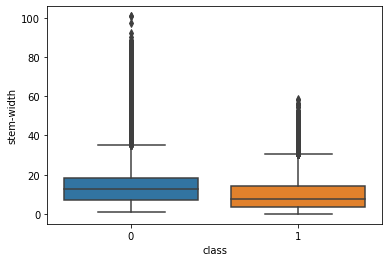

In [32]:
sns.boxplot(y='stem-width',x='class', data=one_hot_df)

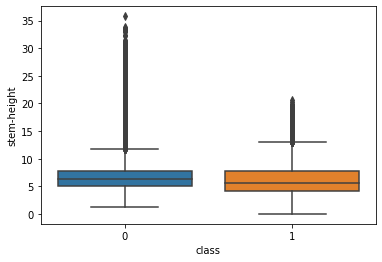

In [33]:
sns.boxplot(y='stem-height',x='class', data=one_hot_df)

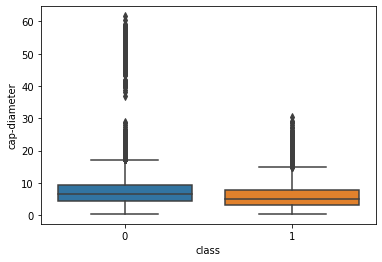

In [34]:
sns.boxplot(y='cap-diameter',x='class', data=one_hot_df)

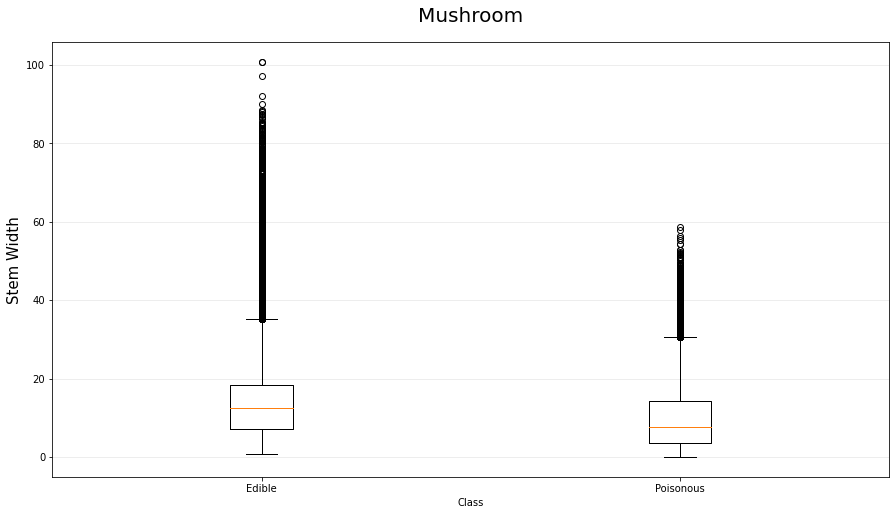

In [35]:
plot_final = [edible_df["stem-width"], poisonous_df["stem-width"]]

fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.set_title('Mushroom', fontsize=20, pad=20)
ax1.set_xlabel('Class')
ax1.set_ylabel('Stem Width', fontsize=15)
plt.rcParams['font.size'] = 14
ax1.boxplot(plot_final, labels=["Edible","Poisonous"])
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)

plt.show()

In [36]:
import scipy.stats as st
st.f_oneway(edible_df["stem-width"], poisonous_df["stem-width"])

F_onewayResult(statistic=2510.1154924688085, pvalue=0.0)

In [37]:
st.f_oneway(edible_df["stem-height"], poisonous_df["stem-height"])

F_onewayResult(statistic=927.038443411786, pvalue=4.2660727183931555e-202)

In [38]:
st.f_oneway(edible_df["cap-diameter"], poisonous_df["cap-diameter"])

F_onewayResult(statistic=2095.5790441905256, pvalue=0.0)

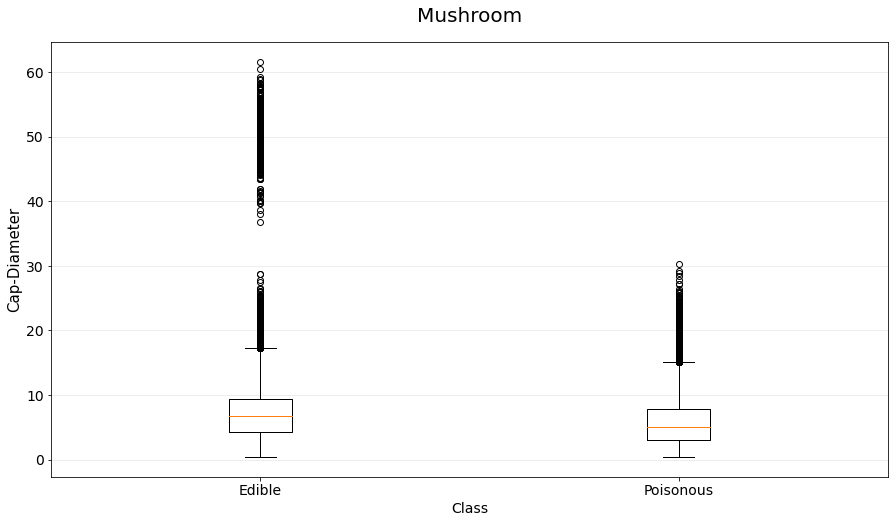

In [39]:
plot_final = [edible_df["cap-diameter"], poisonous_df["cap-diameter"]]

fig1, ax1 = plt.subplots(figsize=(15,8))
ax1.set_title('Mushroom', fontsize=20, pad=20)
ax1.set_xlabel('Class')
ax1.set_ylabel('Cap-Diameter', fontsize=15)
plt.rcParams['font.size'] = 14
ax1.boxplot(plot_final, labels=["Edible","Poisonous"])
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
ax1.set_axisbelow(True)

plt.show()